In [4]:
import pandas as pd
import numpy as np

In [5]:
history = pd.read_csv('../data/history_data.csv')
watch_e = pd.read_csv('../data/watch_e_data.csv')
buy = pd.read_csv('../data/buy_data.csv')
search = pd.read_csv('../data/search_data.csv')
meta = pd.read_csv('../data/meta_data.csv')
meta_plus = pd.read_csv('../data/meta_data_plus.csv')
profile = pd.read_csv('../data/profile_data.csv')

/tmp/ipykernel_50873/1490594871.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('../data/meta_data.csv')


In [6]:
submission = pd.read_csv('../data/sample_submission.csv')

In [7]:
submission.head()

,profile_id,predicted_list
0,3,[0]
1,5,[0]
2,7,[0]
3,12,[0]
4,16,[0]


In [8]:
pred_n_user = len(submission['profile_id'].unique())
print(f'예측해야하는 user의 수: {pred_n_user}')

예측해야하는 user의 수: 8311


- 위에 해당하는 유저들에게 25개 추천

In [9]:
print(history.shape)
history.head()

(1005651, 8)


,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer
0,3,20220301115653,20220301115719,MKID003,15,NaN,Y,N
1,3,20220301115653,20220301115809,MKID003,16,NaN,Y,N
2,3,20220301115653,20220301115958,MKID003,17,NaN,Y,N
3,3,20220301115653,20220301120118,MKID003,18,NaN,Y,N
4,3,20220301115653,20220301120229,MKID003,19,NaN,Y,N


In [10]:
history.tail()

,profile_id,ss_id,log_time,act_target_dtl,album_id,payment,continuous_play,short_trailer
1005646,33032,20220427155091,20220427155668,MKID003,381,NaN,Y,N
1005647,33032,20220427155091,20220427155680,MKID003,381,NaN,Y,N
1005648,33032,20220427155839,20220427155810,MKID003,125,NaN,Y,N
1005649,33032,20220427155706,20220427155838,MKID003,125,NaN,Y,N
1005650,33032,20220427155865,20220427155891,MKID003,381,NaN,N,N


In [11]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005651 entries, 0 to 1005650
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   profile_id       1005651 non-null  int64  
 1   ss_id            1005651 non-null  int64  
 2   log_time         1005651 non-null  int64  
 3   act_target_dtl   1005651 non-null  object 
 4   album_id         1005651 non-null  int64  
 5   payment          73486 non-null    float64
 6   continuous_play  1005651 non-null  object 
 7   short_trailer    1005651 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 61.4+ MB


In [12]:
history_n_user = len(history['profile_id'].unique())
history_n_item = len(history['album_id'].unique())
print(f'history에 있는 unique user 수: {history_n_user}')
print(f'history에 있는 unique item 수: {history_n_item}')

history에 있는 unique user 수: 8311
history에 있는 unique item 수: 20695


<AxesSubplot:ylabel='Frequency'>

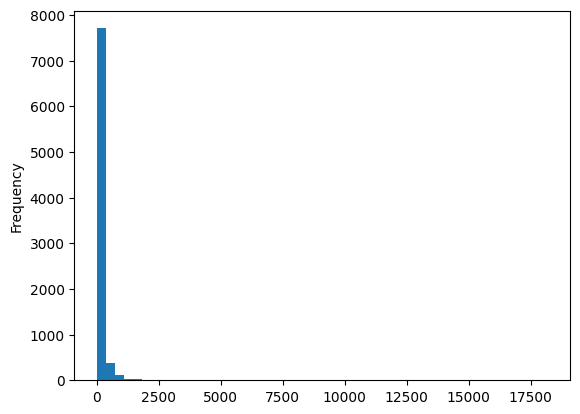

In [23]:
history['profile_id'].value_counts().plot(kind='hist', bins=50)

<AxesSubplot:ylabel='Frequency'>

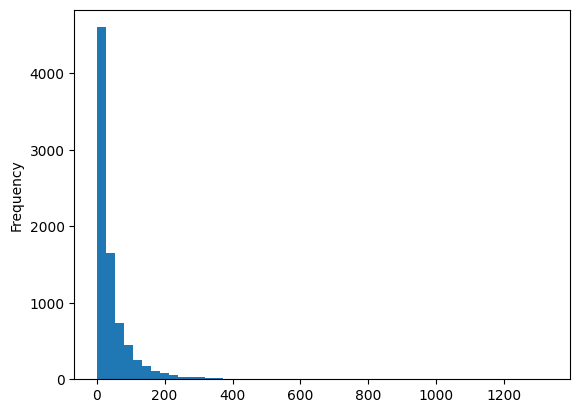

In [24]:
# 중복제거 후 (user가 시청한 item)
history.drop_duplicates(['profile_id','album_id'])['profile_id'].value_counts().plot(kind='hist', bins=50)

In [25]:
history.drop_duplicates(['profile_id','album_id'])['profile_id'].value_counts().describe()

count    8311.000000
mean       45.788353
std        71.871846
min         1.000000
25%         8.000000
50%        23.000000
75%        54.000000
max      1328.000000
Name: profile_id, dtype: float64

In [14]:
print(watch_e.shape)
watch_e.head()

(892794, 8)


,profile_id,ss_id,log_time,act_target_dtl,album_id,watch_time,total_time,continuous_play
0,3,20220301115653,20220301115805,MKID049,15,46,46,1
1,3,20220301115653,20220301115954,MKID049,16,104,105,1
2,3,20220301115653,20220301120114,MKID049,17,76,76,1
3,3,20220301115653,20220301120226,MKID049,18,67,68,1
4,3,20220301115653,20220301120400,MKID049,19,90,90,0


In [15]:
watch_e_n_user = len(watch_e['profile_id'].unique())
watch_e_n_item = len(watch_e['album_id'].unique())
print(f'watch_e에 있는 unique user 수: {watch_e_n_user}')
print(f'watch_e에 있는 unique item 수: {watch_e_n_item}')

watch_e에 있는 unique user 수: 7658
watch_e에 있는 unique item 수: 20361


<AxesSubplot:>

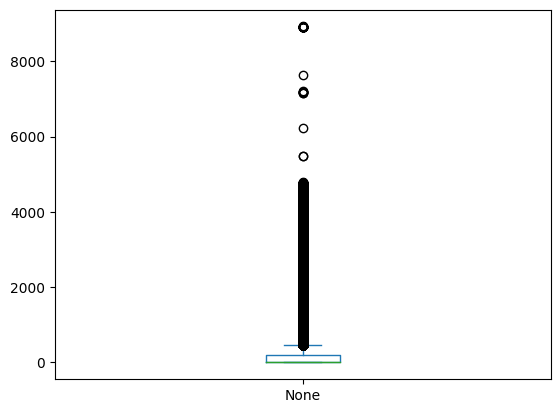

In [16]:
# 영상 실제 시간과 시청 시간의 차이
(watch_e['total_time'] - watch_e['watch_time']).plot(kind='box')

In [17]:
print(buy.shape)
buy.head()

(150, 6)


,profile_id,ss_id,log_time,act_target_dtl,album_id,payment
0,255,20220426153942,20220426154128,MKID004,3767,500
1,1603,20220309163919,20220309164043,MKID004,1640,300
2,5303,20220411080324,20220411082725,MKID004,3821,500
3,5303,20220411080324,20220411084013,MKID004,3822,500
4,5303,20220411080324,20220411085607,MKID004,3823,500


- 구매데이터는 너무 sparse 하다

In [18]:
print(search.shape)
search.head()

(6474, 5)


,profile_id,ss_id,log_time,act_target_dtl,album_id
0,59,20220303183951,20220303183914,MKID017,2141
1,59,20220303183951,20220303183914,MKID017,2141
2,59,20220303183951,20220303183914,MKID017,2141
3,59,20220304181433,20220304181525,MKID017,512
4,59,20220304181433,20220304182447,MKID017,2141


- 검색데이터도 sparse 하다

In [19]:
print(meta.shape)
meta.head()

(42602, 16)


,album_id,title,sub_title,genre_large,genre_mid,genre_small,country,run_time,onair_date,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,cast_7
0,749,어둠이 무서워요,꼬마버스 타요1,키즈,TV만화,NaN,한국,660,NaN,타요,로기,라니,가니,시투,NaN,NaN
1,750,우리는 친구,꼬마버스 타요1,키즈,TV만화,NaN,한국,660,NaN,타요,로기,라니,가니,시투,NaN,NaN
2,2131,타요의 첫 운행,꼬마버스 타요1,키즈,TV만화,NaN,한국,660,NaN,타요,로기,라니,가니,시투,NaN,NaN
3,2625,길 잃은 타요,꼬마버스 타요1,키즈,TV만화,NaN,한국,660,NaN,타요,로기,라니,가니,시투,NaN,NaN
4,2594,새내기 꼬마 버스의 하루,꼬마버스 타요1,키즈,TV만화,NaN,한국,660,NaN,타요,로기,라니,가니,시투,NaN,NaN


- `sub_title`, `genre_(large, mid)` 는 사용할 수 있을듯
- `country`도 이용하고 싶은데 NaN이 있음

In [34]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42602 entries, 0 to 42601
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   album_id     42602 non-null  int64  
 1   title        42602 non-null  object 
 2   sub_title    42602 non-null  object 
 3   genre_large  42602 non-null  object 
 4   genre_mid    42602 non-null  object 
 5   genre_small  13419 non-null  object 
 6   country      33734 non-null  object 
 7   run_time     42602 non-null  int64  
 8   onair_date   5344 non-null   float64
 9   cast_1       27603 non-null  object 
 10  cast_2       22048 non-null  object 
 11  cast_3       16463 non-null  object 
 12  cast_4       12485 non-null  object 
 13  cast_5       6382 non-null   object 
 14  cast_6       2609 non-null   object 
 15  cast_7       762 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 5.2+ MB


In [33]:
unique_n_sub_title = len(meta['sub_title'].unique())
print(f'unique sub_title 수: {unique_n_sub_title}')

unique_n_genre_large = len(meta['genre_large'].unique())
print(f'unique genre_large 수: {unique_n_genre_large}')

unique_n_genre_mid = len(meta['genre_mid'].unique())
print(f'unique genre_mid 수: {unique_n_genre_mid}')

unique_n_country = len(meta['country'].unique())
print(f'unique n_country 수: {unique_n_country}')

unique sub_title 수: 2373
unique genre_large 수: 6
unique genre_mid 수: 29
unique n_country 수: 21


In [20]:
print(meta_plus.shape)
meta_plus.head()

(767948, 4)


,album_id,keyword_type,keyword_name,keyword_value
0,749,05010101,시리즈,0
1,749,05010302,EBS,0
2,749,05010401,3세,0
3,749,05010402,4세,0
4,749,05010407,1세,0


In [21]:
print(profile.shape)
profile.head()

(8311, 9)


,profile_id,sex,age,pr_interest_keyword_cd_1,pr_interest_keyword_cd_2,pr_interest_keyword_cd_3,ch_interest_keyword_cd_1,ch_interest_keyword_cd_2,ch_interest_keyword_cd_3
0,3,F,5,P02,P04,P07,K01,K03,K04
1,5,M,5,P07,P08,P06,K05,K08,K09
2,7,F,9,P05,P03,NaN,K06,K04,NaN
3,12,M,6,P03,P06,P02,K09,K07,K03
4,16,F,12,P03,P06,P01,K01,K06,K04


In [35]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8311 entries, 0 to 8310
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   profile_id                8311 non-null   int64 
 1   sex                       8311 non-null   object
 2   age                       8311 non-null   int64 
 3   pr_interest_keyword_cd_1  8311 non-null   object
 4   pr_interest_keyword_cd_2  6778 non-null   object
 5   pr_interest_keyword_cd_3  6231 non-null   object
 6   ch_interest_keyword_cd_1  8311 non-null   object
 7   ch_interest_keyword_cd_2  6618 non-null   object
 8   ch_interest_keyword_cd_3  6029 non-null   object
dtypes: int64(2), object(7)
memory usage: 584.5+ KB


- profile 데이터는 전부 사용가능 할 듯
- NaN인 키워드를 어떻게 처리할지만 고민하면 될 듯